# Exemple de lemmatisation

In [1]:
inputText =\
"""
Bonjour bonjour

Lors de notre point mensuel sur la CSS je m’aperçois que sur le mois de mars nous avons énormément de tardifs qui ont été réglés sur mars en comparaison au mois de février. Je ne m’explique pas ce phénomène surtout que de ce que j’avais compris les non règlements du fait du pb avec OXANTIS ne concernaient que 5M€ au total et pour des soins 2019 et que cela devait finalement être récupéré sur le mois d’avril. De mon côté je ne pense pas avoir vu d’alerte sur des factures datant de 2015 et après qui n’auraient pas été réglées. D’où « sortent » ces règlements ?

Je n’ai surement pas tout suivi dans le détail mais je trouve que les tardifs sont très élevés et il me sera demandé une explication par le Fonds CSS. Il est nécessaire je pense d’approfondir ce sujet car cela pourrait avoir des répercussions importantes sur notre définitif au niveau de la mutuelle si ce phénomène est généralisé

   merci côté stats de me donner des précisions sur ce constat pour la CSS et si ceci est également constaté sur l’ensemble du portefeuille HM.
	Et en // merci à Nadège de regarder si tout est OK coté intégration dans DECIBEL

D’avance je vous remercie pour toutes les précisions que vous pourrez m’apporter et je vous souhaite une bonne journée

"""

In [5]:
#fr_dep_news_trf, fr_core_news_md

import spacy, re
lemmatizer = spacy.load("fr_core_news_md", disable = ['parser', 'attribute_ruler', 'ner'])
print("Pipeline:", lemmatizer.pipe_names)

Pipeline: ['tok2vec', 'morphologizer', 'lemmatizer']


In [14]:
doc = lemmatizer(inputText)  # Create a Doc from raw text
words_lemmas_list = [token.lemma_.lower() for token in doc if not token.is_stop and re.match('^[a-z]+$', token.lemma_.lower()) is not None]
print(words_lemmas_list)

['bonjour', 'bonjour', 'point', 'mensuel', 'css', 'apercevoir', 'mois', 'mars', 'tardif', 'mars', 'comparaison', 'mois', 'explique', 'non', 'oxantis', 'concerner', 'total', 'soin', 'devoir', 'finalement', 'mois', 'avril', 'alerte', 'facture', 'dater', 'sortir', 'surement', 'suivre', 'trouve', 'tardif', 'demander', 'explication', 'fonds', 'css', 'approfondir', 'sujet', 'important', 'niveau', 'mutuel', 'stat', 'donner', 'constat', 'css', 'constater', 'ensemble', 'portefeuille', 'hm', 'regarder', 'ok', 'decibel', 'avance', 'remercier', 'pouvoir', 'apporter', 'souhaite', 'bon']


# Application au dataset

In [2]:
import pandas as pd

dataset1 = pd.read_csv('firstdataset.csv',index_col = 0,sep='¤',quotechar='§',encoding='UTF-16', engine='python',header=0,skipinitialspace=True,dtype=str)
dataset1.head()

,demande_de_support,sender,text
0,0,plonquet nadège,1ère relecture gt conso yohan quand tu as le t...
1,0,plonquet nadège,accepter pour accepter la demande cliquez simp...
2,1,guillaume veronique,acces decibel bonjour pouvez vous donner les a...
3,1,gueniot bernard,accès rec4 decibel sdw rec4 hm dm ad restituti...
4,1,levisse xavier,actes indemnités hospitalières tu sais ce que ...


In [2]:
from preprocessing import WriteFinalDataset
WriteFinalDataset(inputFile='firstdataset.csv',outputFile='finaldataset.csv')

Lecture de firstdataset.csv ...
Traitement des données ...
[############################################################] 2514/2514
Ecriture de finaldataset.csv ...


In [66]:
data = pd.read_csv('finaldataset.csv', index_col = 0, header=0, encoding='utf-16')
data

C:\Users\le_paumier-m\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5396) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [67]:
####temporaire

data = data.replace(['0',0,'unkown'],[0,1,2])


(array([ 391.,    0.,    0.,    0.,    0., 1664.,    0.,    0.,    0.,
         459.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

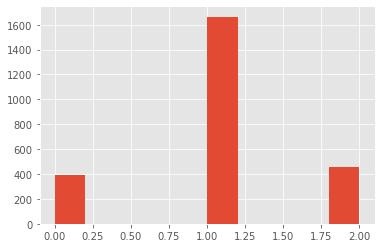

In [68]:
plt.hist(list(data['demande_de_support']))

In [80]:
X_unlabeled = data.loc[data["demande_de_support"] == 2]
X = data.loc[data["demande_de_support"] != 2].drop(columns=['demande_de_support'])
y = pd.Series(data.loc[data["demande_de_support"] != 2]['demande_de_support'], dtype=int)

types = {0:'Non Assistance', 1:"Assistance"}

#types = {0:'Non Assistance', 1:"Aide à l'utilisation", 2:"Assistance", 3:"Demande d'habilitation", 4:"Demande d'information"}
# extraire direction + service

In [42]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [108]:
def costFN(y_true,y_pred):
    return np.mean(y_true)

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90210)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=90210)

clustering = KMeans(n_clusters=2, random_state=8675309, n_jobs=-1)
clustering.fit(X_train)

# predict labels on the val set
y_pred = clustering.predict(X_val)
accuracy_score(y_val,y_pred)

C:\Users\le_paumier-m\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0.20040485829959515